# WordCloud - Analysis Export

*Aniket Pant, GT MSE, PHIL 3127 Fall 2020*

In [1]:
import pandas as pd
import re
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
sns.set_theme(style="whitegrid")
%matplotlib inline

# Load Data

In [2]:
skripal_df = pd.read_csv("./skripal_export.csv")
iranian_df = pd.read_csv("./scientist_assassination.csv")

In [3]:
df = pd.concat([skripal_df, iranian_df])
# df = df.dropna(axis=1, how='all')

In [4]:
df.head()

,Subject,Business indexing term,Location,People,URL,Title,Author,Publication title,Pages,Publication year,...,Unnamed: 265,Unnamed: 266,Unnamed: 267,Unnamed: 268,Unnamed: 269,Unnamed: 270,Unnamed: 271,Unnamed: 272,Unnamed: 273,Unnamed: 274
0,Infectious diseases;Enrollments;Social distanc...,Unemployment benefits,United States--US; United Kingdom--UK; Minnesota,"Elizabeth II, Queen of Great Britain",https://www.nytimes.com/2020/10/15/nyregion/15...,Coronavirus Update: [Foreign Desk],"Barron, James","New York Times, Late Edition (East Coast); New...",A.4,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Poisoning;Conventions;Biological & chemical we...,NaN,Russia; Germany; United Kingdom--UK,"Navalny, Alexei",https://www.nytimes.com/2020/10/06/world/europ...,"Putin's Leading Rival Was Poisoned, Affirm Wor...","Schwirtz, Michael","New York Times, Late Edition (East Coast); New...",A.15,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Public health;Poisoning;Documentary films;Mili...,NaN,Russia; United Kingdom--UK,"Skripal, Sergei V; Sturgess, Dawn",https://www.nytimes.com/2020/10/01/arts/televi...,Picking Up the Pieces After the Poisonings: [T...,"Schwirtz, Michael","New York Times, Late Edition (East Coast); New...",C.3,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Social networks;Poisoning;Coma;Biological & ch...,NaN,Russia; France; Germany,"Navalny, Alexei",https://www.nytimes.com/2020/09/23/world/europ...,Putin Critic Leaves Hospital After Poisoning: ...,"Eddy, Melissa","New York Times, Late Edition (East Coast); New...",A.10,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Poisoning;Biological & chemical weapons;Murder...,Sanctions;International relations,Russia,"Navalny, Alexei; Putin, Vladimir",https://www.nytimes.com/2020/09/22/opinion/vla...,What Can Mr. Putin Get Away With?: [Editorial],NaN,"New York Times, Late Edition (East Coast); New...",A.26,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 18
Columns: 275 entries, Subject to Unnamed: 274
dtypes: float64(4), object(271)
memory usage: 426.9+ KB


In [6]:
df = df[['fullText', 'Dataset', 'Author', "People", "Subject", "Title", "Pages", "Publication date"]]
df = df.dropna()
df = df.reset_index(drop = True)
df = df.drop([49])
df = df.reset_index(drop = True)
df = df[df.fullText != "Error encountered in scraping fullText."]

In [7]:
df['Page'] = df['Pages'].apply(lambda x: list(map(int, re.findall(r'\d+', x)))[0])

In [8]:
df.head()

,fullText,Dataset,Author,People,Subject,Title,Pages,Publication date,Page
0,The Organization for the Prohibition of Chemic...,Skripal,"Schwirtz, Michael","Navalny, Alexei",Poisoning;Conventions;Biological & chemical we...,"Putin's Leading Rival Was Poisoned, Affirm Wor...",A.15,7-Oct-20,15
1,A new AMC show dramatizes the 2018 poisoning o...,Skripal,"Schwirtz, Michael","Skripal, Sergei V; Sturgess, Dawn",Public health;Poisoning;Documentary films;Mili...,Picking Up the Pieces After the Poisonings: [T...,C.3,6-Oct-20,3
2,Doctors treating Aleksei Navalny said he had b...,Skripal,"Eddy, Melissa","Navalny, Alexei",Social networks;Poisoning;Coma;Biological & ch...,Putin Critic Leaves Hospital After Poisoning: ...,A.10,24-Sep-20,10
3,The opposition leader jokes that he has recove...,Skripal,"Schwirtz, Michael","Navalny, Alexei",Social networks;Poisoning;Biological & chemica...,"Putin Critic, Still on Mend, Flashes Wit On In...",A.14,20-Sep-20,14
4,Aides of the Russian opposition leader collect...,Skripal,"Schwirtz, Michael","Navalny, Alexei",Poisoning;Biological & chemical weapons;Assass...,"Navalny Was Poisoned at Hotel in Siberia, Not ...",A.11,18-Sep-20,11


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 131
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fullText          110 non-null    object
 1   Dataset           110 non-null    object
 2   Author            110 non-null    object
 3   People            110 non-null    object
 4   Subject           110 non-null    object
 5   Title             110 non-null    object
 6   Pages             110 non-null    object
 7   Publication date  110 non-null    object
 8   Page              110 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 8.6+ KB


In [10]:
df.Dataset.value_counts()

Skripal                    103
Scientist Assassination      7
Name: Dataset, dtype: int64

# WordCloud

In [12]:
from wordcloud import WordCloud, STOPWORDS
comment_words = '' 
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("mr")

## Skripal

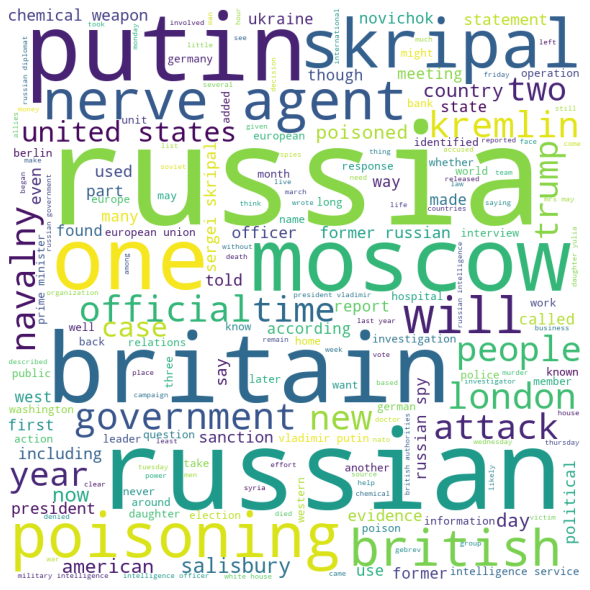

In [13]:
# iterate through the csv file 
for val in df[df['Dataset'] == "Skripal"]['fullText']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

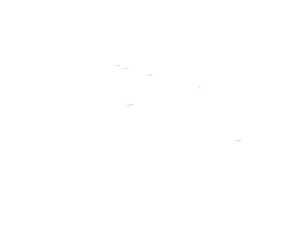

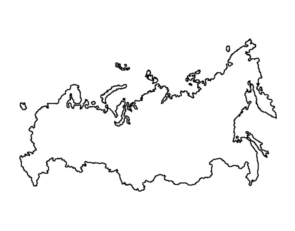

In [16]:
from os import path
from PIL import Image
import numpy as np
import os

# load image
russia_mask = np.array(Image.open("./russia.jpg"))

wc = WordCloud(width = 1000, height = 1000,
                mask=russia_mask,
                background_color ='white', 
                max_words=100,
                stopwords = stopwords,
                min_font_size = 5)
  
# generate word cloud
wc.generate(comment_words)

# store to file
wc.to_file("russiaWC.png")

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(russia_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()